In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv('data/cleanup/Shunyi.csv', index_col=['date'])
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [3]:
# convert index to datetime object
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='date', length=35064, freq=None)

date
2013-03-01 00:00:00     NW
2013-03-01 01:00:00     NW
2013-03-01 02:00:00     NW
2013-03-01 03:00:00     NW
2013-03-01 04:00:00     NW
2013-03-01 05:00:00    NNW
2013-03-01 06:00:00    NNE
2013-03-01 07:00:00     NE
2013-03-01 08:00:00    NNW
2013-03-01 09:00:00    SSW
2013-03-01 10:00:00    NNW
2013-03-01 11:00:00    NNW
2013-03-01 12:00:00     NE
2013-03-01 13:00:00     NE
2013-03-01 14:00:00    ENE
2013-03-01 15:00:00     NE
2013-03-01 16:00:00    NNE
2013-03-01 17:00:00    NNW
2013-03-01 18:00:00     NW
2013-03-01 19:00:00      N
2013-03-01 20:00:00     NE
2013-03-01 21:00:00    ENE
2013-03-01 22:00:00    ENE
2013-03-01 23:00:00     NE
Name: wd, dtype: object


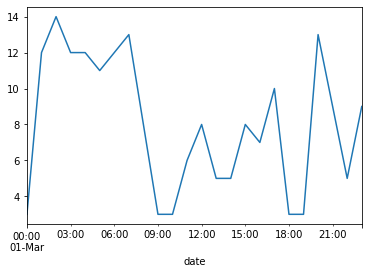

In [4]:
# explore relationship between wind speed and PM2.5 
df_daily1 = data[data.index.strftime('%Y-%m-%d') == '2013-03-01']
print(df_daily1['wd'])
df_daily1['PM2.5'].plot()

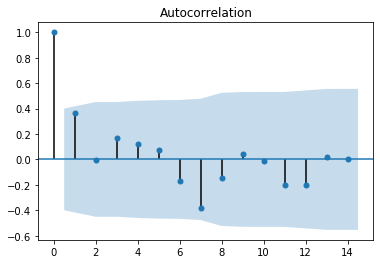

In [5]:
# exam the Autocorrelation of PM2.5

from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df_daily1['PM2.5'])
plt.show()

## Preprocessing---how to calculate change rate of PM2.5 (μg.m3-1/hour)

In [7]:
# One our prediction seems like a reasonable choice

'''
Modify the data accoring to EDA, drop 'wd', drop na, turn temperature and dew point into RH(relative humidity)
calculate one houre PM2.5 change rate
'''
import math

# drop 'wd' first
data.drop(columns=['wd'], inplace=True)
# convert temperature/dew point into RH
data['RH'] = data.apply(lambda x: math.exp(17.27*x.DEWP/(237.7+x.DEWP)-17.27*x.TEMP/(237.7+x.TEMP)), axis=1)
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,RH
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3,0.209222
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4,0.197983
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6,0.178054
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,6.6,0.178550
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,4.5,0.189187
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8,0.188669
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5,0.238267
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7,0.199573


In [10]:
# now we can drop the TEMP and DEWP
data_new = data.drop(columns=['TEMP', 'DEWP'])
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH
date,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187
...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573


In [11]:
# here we shift 1 to obtain 1 hour PM2.5 change rate
data_new['PM1hour'] = data_new['PM2.5'].shift(periods=-1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour
date,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054,12.0
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550,12.0
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187,11.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573,18.0


In [12]:
# 1 hour PM2.5 change rate
data_new['PM2.5Change'] = data_new.apply(lambda x: x.PM1hour - x['PM2.5'] if ((not pd.isna(x.PM1hour)) and (not pd.isna(x['PM2.5']))) else np.nan, axis=1)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,1026.2,0.0,8.6,0.178054,12.0,-2.0
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,1027.3,0.0,6.6,0.178550,12.0,0.0
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,1027.7,0.0,4.5,0.189187,11.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0
2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,1014.6,0.0,1.7,0.199573,18.0,0.0


In [13]:
# how many rows that we don't have data?

data_new[data_new['PM2.5Change'].isna()]

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-09 11:00:00,76.0,764.0,59.0,66.0,1500.0,90.0,1003.6,0.0,9.7,0.159041,NaN,NaN
2013-03-09 12:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1006.6,0.0,9.9,0.129068,NaN,NaN
2013-03-09 13:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1009.0,0.0,7.6,0.139415,NaN,NaN
2013-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1010.4,0.0,6.2,0.129010,NaN,NaN
2013-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,90.0,1011.7,0.0,5.9,0.128784,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-21 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1027.8,0.0,3.6,0.530891,59.0,NaN
2017-02-23 15:00:00,4.0,6.0,3.0,14.0,200.0,87.0,1022.8,0.0,3.5,0.179029,NaN,NaN
2017-02-23 16:00:00,NaN,NaN,2.0,14.0,300.0,84.0,1022.5,0.0,3.9,0.169685,NaN,NaN


In [14]:
# drop NA now 
data_new.dropna(inplace=True)
# data_new.drop(columns=['PM2.5','PM1hour'], inplace=True)
data_new

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 05:00:00,11.0,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0
2013-03-01 06:00:00,12.0,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0
2013-03-01 07:00:00,13.0,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,35.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0
2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0


## Bayesian inference

### Our model
$$\frac{\mathrm{d}PM_{2.5}}{\mathrm{d}t} =Background + \sum_{i=0}^5 \alpha_ix_i(x_1=RH,x_2=windspeed,x_3=CO,x_4=NO,x_5=SO_2)$$

In [15]:
# remove PM10
data_new.drop(columns=['PM10'], inplace=True)
data_new

,PM2.5,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,
2013-03-01 00:00:00,3.0,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,12.0,9.0
2013-03-01 01:00:00,12.0,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,14.0,2.0
2013-03-01 05:00:00,11.0,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,12.0,1.0
2013-03-01 06:00:00,12.0,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,13.0,1.0
2013-03-01 07:00:00,13.0,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,8.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,15.0,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,27.0,12.0
2017-02-28 19:00:00,27.0,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,47.0,20.0
2017-02-28 20:00:00,47.0,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,18.0,-29.0


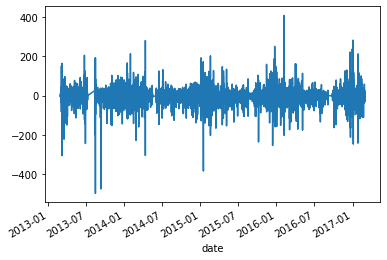

In [16]:
data_new['PM2.5Change'].plot()

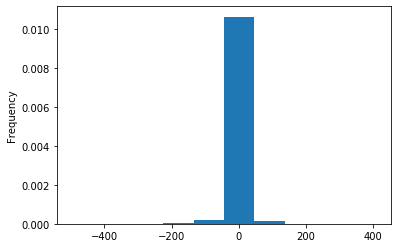

In [17]:
data_new['PM2.5Change'].plot.hist(density=True)

In [32]:
# RELU
def relu(x):
    return np.array([max(0.0, i-5.0) for i in x])

In [34]:
# we assume that the change rate is a normal distribution and its expectation mu follows our model

# x1:RH
X1 = data_new['RH'].to_numpy()
# x2:windspeed
X2 = data_new['WSPM'].to_numpy()
# x3:CO
X3 = data_new['CO'].to_numpy()
# x4:NO2
X4 = data_new['NO2'].to_numpy()
# x5:SO2
X5 = data_new['SO2'].to_numpy()

# observation
Y = data_new['PM2.5Change'].to_numpy()

In [35]:
X1.shape 

(30347,)

In [36]:
import pymc3 as pm

with pm.Model() as pm25_model:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    alpha4 = pm.Normal('alpha4', mu=0, sd=10)
    alpha5 = pm.Normal('alpha5', mu=0, sd=10)
    # c = pm.Normal('c', mu=0, sd=10)
    
    sigma = pm.HalfNormal('sigma', sd=50)
    
    mu = alpha1 * X1 + alpha2 * relu(X2) + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 
    
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [45]:
with pm25_model:
    # draw 500 posterior samples
    trace = pm.sample(2000, tune=1000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, c, alpha5, alpha4, alpha3, alpha2, alpha1]
Sampling 2 chains: 100%|██████████| 6000/6000 [03:09<00:00, 31.62draws/s] 


In [46]:
with pm25_model:
    posterior_predictive = pm.sample_posterior_predictive(trace)
    prior = pm.sample_prior_predictive()

100%|██████████| 4000/4000 [00:11<00:00, 352.28it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2afa1b90>,
      dtype=object)

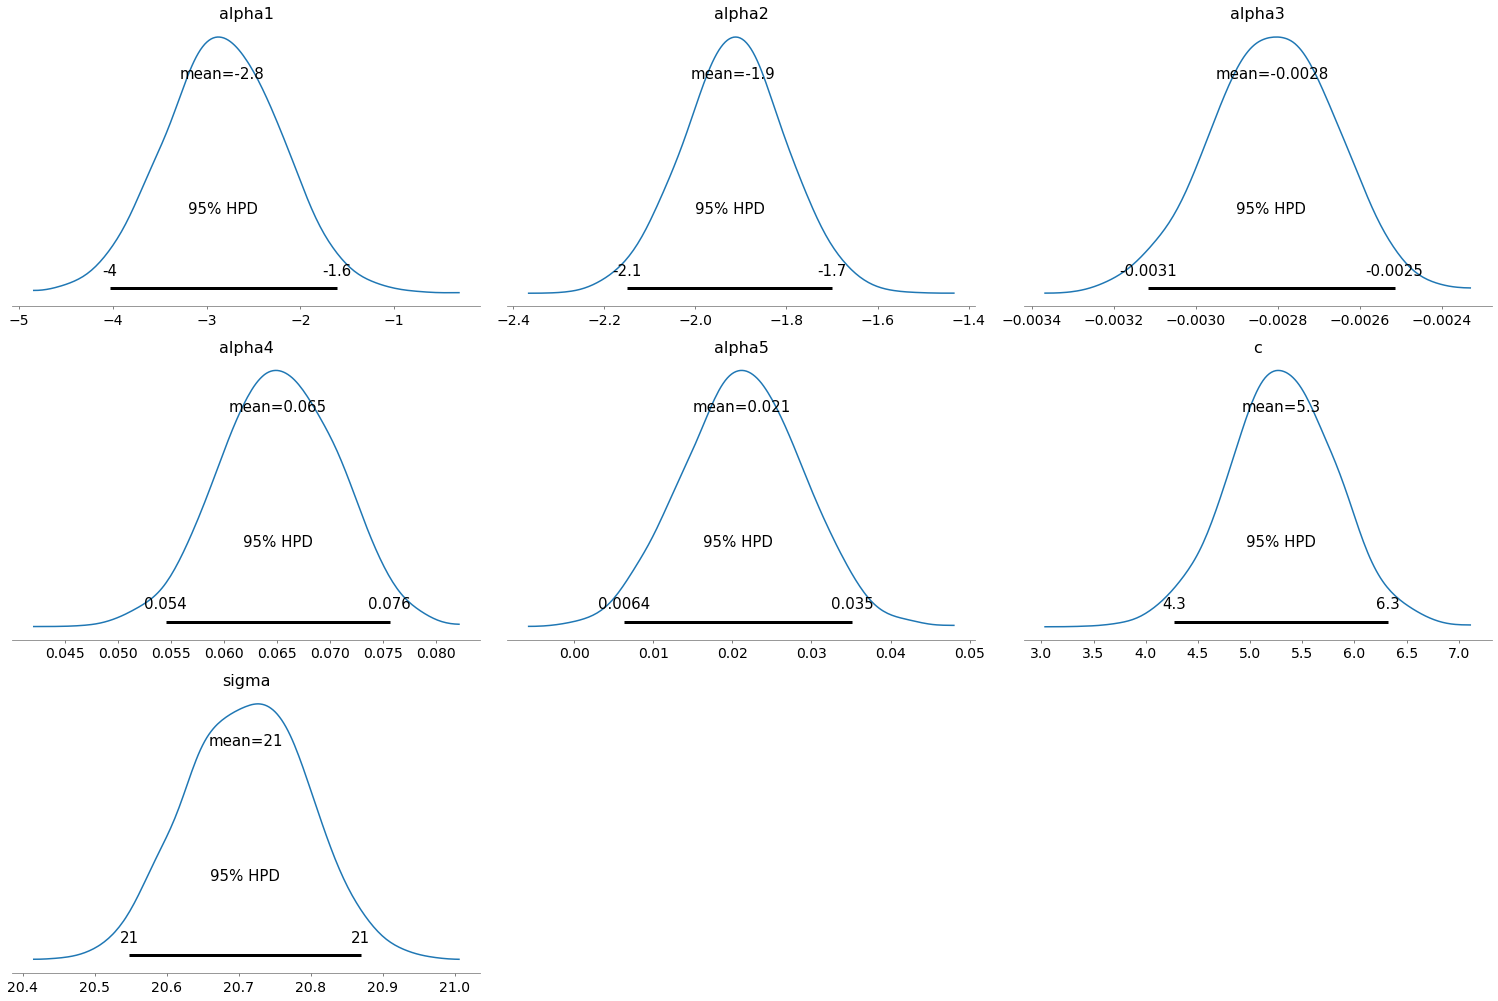

In [47]:
import arviz as az

with pm25_model:
    data = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)
    
az.plot_posterior(data, round_to=2, credible_interval=0.95)

In [42]:
def delta(X1, X2, X3, X4, X5):
    return -2.8 * X1 - 1.9 * max(0.0, X2-5.0) - 0.0028 * X3 + 0.065 * X4 + 0.021 * X5


In [44]:
data_new['prediction'] = data_new.apply(lambda x: delta(x.RH, x.WSPM, x.CO, x.NO2, x.SO2), axis=1)
data_new

,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM2.5Change,prediction
date,,,,,,,,,,
2013-03-01 00:00:00,3.0,8.0,300.0,44.0,1025.8,0.0,9.3,0.209222,9.0,-13.212823
2013-03-01 01:00:00,3.0,7.0,300.0,47.0,1026.1,0.0,9.4,0.197983,2.0,-13.436352
2013-03-01 05:00:00,3.0,7.0,200.0,45.0,1028.2,0.0,1.7,0.209214,1.0,1.442201
2013-03-01 06:00:00,3.0,9.0,300.0,74.0,1029.0,0.0,1.6,0.247706,1.0,1.374422
2013-03-01 07:00:00,3.0,23.0,300.0,59.0,1030.5,0.0,1.7,0.217901,-5.0,2.177878
...,...,...,...,...,...,...,...,...,...,...
2017-02-28 18:00:00,6.0,39.0,500.0,67.0,1013.5,0.0,1.3,0.168719,12.0,3.618586
2017-02-28 19:00:00,8.0,92.0,800.0,16.0,1014.2,0.0,1.8,0.188669,20.0,5.259728
2017-02-28 20:00:00,17.0,86.0,1100.0,19.0,1014.5,0.0,1.5,0.238267,-29.0,4.649852


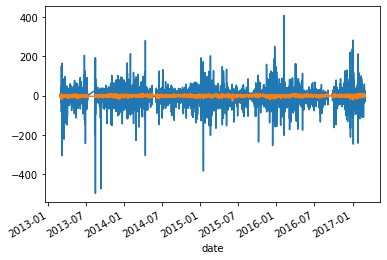

In [48]:
data_new['PM2.5Change'].plot()
data_new['prediction'].plot()

In [49]:
data_new[data_new['PM2.5Change'] > 100]

,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM2.5Change,prediction
date,,,,,,,,,,
2013-03-05 18:00:00,86.0,128.0,2100.0,61.0,1010.70,0.0,0.7,0.358888,151.0,7.211112
2013-03-08 12:00:00,67.0,94.0,2100.0,98.0,1002.40,0.0,5.5,0.339123,165.0,-4.462543
2013-06-24 01:00:00,3.0,42.0,800.0,87.0,999.60,0.0,1.2,0.827860,125.0,1.254991
2013-06-24 02:00:00,4.0,49.0,1700.0,55.0,999.30,0.0,1.5,0.918195,206.0,-1.611947
2013-06-24 14:00:00,3.0,22.0,1800.0,225.0,997.90,0.0,1.8,0.709853,107.0,-3.654588
...,...,...,...,...,...,...,...,...,...,...
2017-01-27 21:00:00,58.0,68.0,1800.0,27.0,1023.00,0.0,1.5,0.289408,213.0,2.237658
2017-01-27 22:00:00,101.0,75.0,2300.0,18.0,1022.25,0.0,0.9,0.305448,126.0,3.290747
2017-01-28 01:00:00,149.0,81.0,2600.0,8.0,1021.00,0.0,0.7,0.355558,125.0,4.088438


In [10]:
df_daily2 = data_new[data_new.index.strftime('%Y-%m-%d') == '2013-06-24']
df_daily2

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,RH,PM1hour,PM2.5Change
date,,,,,,,,,,,,
2013-06-24 00:00:00,90.0,96.0,3.0,43.0,800.0,107.0,1000.2,0.0,1.2,0.788898,96.0,6.0
2013-06-24 01:00:00,96.0,98.0,3.0,42.0,800.0,87.0,999.6,0.0,1.2,0.827860,221.0,125.0
2013-06-24 02:00:00,221.0,226.0,4.0,49.0,1700.0,55.0,999.3,0.0,1.5,0.918195,427.0,206.0
2013-06-24 03:00:00,427.0,226.0,4.0,57.0,3200.0,33.0,999.6,0.0,1.3,0.958083,369.0,-58.0
2013-06-24 04:00:00,369.0,312.0,3.0,55.0,3200.0,29.0,999.6,0.0,2.3,1.000000,360.0,-9.0
2013-06-24 05:00:00,360.0,306.0,3.0,53.0,3000.0,22.0,999.9,0.0,1.4,1.000000,292.0,-68.0
2013-06-24 06:00:00,292.0,215.0,3.0,28.0,2399.0,46.0,1000.3,0.0,1.6,0.987919,268.0,-24.0
2013-06-24 07:00:00,268.0,192.0,3.0,28.0,2399.0,46.0,1000.6,0.0,1.5,0.930084,261.0,-7.0
2013-06-24 08:00:00,261.0,190.0,3.0,27.0,2000.0,60.0,1000.8,0.0,1.6,0.860390,252.0,-9.0
